**SPEECH EMOTION RECOGNITION - MACHINE LEARNING/DEEP LEARNING**

                                          Using Machine Learning

In [1]:
import librosa
import librosa.display
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
import soundfile
import os, glob, pickle
import sys
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [3]:
from IPython.display import Audio

In [4]:
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)    

In [5]:
def extract_feature(file_name, mfcc, chroma, mel):
    X, sample_rate = librosa.load(os.path.join(file_name), res_type='kaiser_fast')
    if chroma:
        stft=np.abs(librosa.stft(X))
    result=np.array([])
    if mfcc:
        mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        result=np.hstack((result, mfccs))
    if chroma:
        chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
        result=np.hstack((result, chroma))
    if mel:
        mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        result=np.hstack((result, mel))
    return result

In [6]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
# Emotions to observe
observed_emotions=['neutral','calm','happy','sad','angry','fearful', 'disgust','surprised']

In [7]:
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob('C:/Users/HP/Desktop/FINAL PROJECT/RAVTESS/Actor_*/*.wav'):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, train_size= 0.75,random_state=9)

In [8]:
# Split the dataset
import time
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

In [9]:
print((x_train.shape[0], x_test.shape[0]))

(3939, 1313)


In [10]:
# Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


**MLP Classifier**

In [11]:
# Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [12]:
# Train the model
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [13]:
# Predict for the test set
y_pred=model.predict(x_test)

In [14]:
# Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
# Print the accuracy
print("The accuracy of trained model is: {:5.2f}%".format(accuracy*100))

The accuracy of trained model is: 81.42%


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       angry       0.83      0.93      0.88       200
        calm       0.82      0.68      0.75        88
     disgust       0.93      0.72      0.81       140
     fearful       0.84      0.79      0.81       191
       happy       0.60      0.93      0.73       201
     neutral       0.98      0.86      0.92       168
         sad       0.93      0.68      0.79       184
   surprised       0.84      0.81      0.83       141

    accuracy                           0.81      1313
   macro avg       0.85      0.80      0.81      1313
weighted avg       0.84      0.81      0.82      1313



In [16]:
 from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test,y_pred)
print (matrix)

[[185   1   1   2  10   0   0   1]
 [  0  60   2   0  23   1   0   2]
 [  6   2 101   1  19   0   0  11]
 [ 12   1   0 151  19   0   7   1]
 [  9   0   1   3 187   0   1   0]
 [  4   1   1   0  13 145   1   3]
 [  5   8   2  21  17   2 126   3]
 [  1   0   1   2  23   0   0 114]]


                                         Using Deep Learning

**Decision Tree Classifier**

In [17]:
import librosa
from librosa import display

data, sampling_rate = librosa.load('C:/Users/HP/Desktop/FINAL PROJECT/CNN Model_panic.wav')

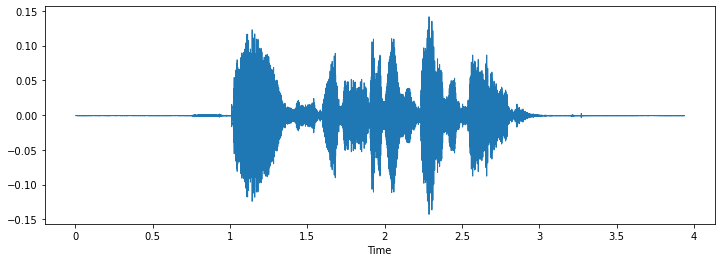

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
librosa.display.waveshow(data, sr=sampling_rate)

In [19]:
import time
import os
path = 'C:/Users/HP/Desktop/FINAL PROJECT/RAVTESS/'
lst = []

start_time = time.time()

for subdir, dirs, files in os.walk(path):
  for file in files:
      try:
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
        # The instruction below converts the labels (from 1 to 8) to a series from 0 to 7
        # This is because our predictor needs to start from 0 otherwise it will try to predict also 0.
        file = int(file[7:8]) - 1 
        arr = mfccs, file
        lst.append(arr)
      # If the file is not valid, skip it
      except ValueError:
        continue

print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

--- Data loaded. Loading time: 488.6064658164978 seconds ---


In [20]:
# Creating X and y: zip makes a list of all the first elements, and a list of all the second elements.
X, y = zip(*lst)

In [21]:
import numpy as np
X = np.asarray(X)
y = np.asarray(y)


X.shape, y.shape

((5252, 40), (5252,))

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
dtree = DecisionTreeClassifier()

In [25]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
predictions = dtree.predict(X_test)

In [27]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       201
           1       0.60      0.57      0.59       123
           2       0.57      0.56      0.57       256
           3       0.68      0.63      0.65       263
           4       0.73      0.69      0.71       255
           5       0.61      0.69      0.65       241
           6       0.65      0.66      0.65       193
           7       0.65      0.65      0.65       202

    accuracy                           0.66      1734
   macro avg       0.66      0.66      0.66      1734
weighted avg       0.66      0.66      0.66      1734



In [28]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test,predictions)
print (matrix)

[[159  10   3  17   2   4   1   5]
 [ 16  70   8  12   1   6   6   4]
 [  5  11 143  11  26  26  10  24]
 [ 11  15  21 167   4  22  16   7]
 [  2   3  13  11 177  23  12  14]
 [  8   2  22  17  12 166   8   6]
 [  8   4  19   8   5  12 127  10]
 [  4   1  20   4  14  12  16 131]]


**Neural Network**

In [29]:
import librosa
from librosa import display
import os

In [30]:
import numpy as np
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [31]:
x_traincnn.shape, x_testcnn.shape

((3518, 40, 1), (1734, 40, 1))

In [32]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow import keras
from keras import optimizers

In [33]:
model = Sequential()

model.add(Conv1D(64, 5,padding='same',input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(256, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(lr=0.00005, rho=0.9, epsilon=1e-07, decay=0.0)

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 40, 64)            384       
                                                                 
 activation (Activation)     (None, 40, 64)            0         
                                                                 
 dropout (Dropout)           (None, 40, 64)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 10, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 128)           41088     
                                                                 
 activation_1 (Activation)   (None, 10, 128)           0         
                                                        

In [35]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [38]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=50, validation_data=(x_testcnn, y_test))

Epoch 1/50
220/220 [==============================] - 3s 13ms/step - loss: 0.0619 - accuracy: 0.9804 - val_loss: 0.5575 - val_accuracy: 0.8633
Epoch 2/50
220/220 [==============================] - 3s 13ms/step - loss: 0.0733 - accuracy: 0.9778 - val_loss: 0.4733 - val_accuracy: 0.8812
Epoch 3/50
220/220 [==============================] - 3s 11ms/step - loss: 0.0576 - accuracy: 0.9818 - val_loss: 0.5117 - val_accuracy: 0.8749
Epoch 4/50
220/220 [==============================] - 3s 12ms/step - loss: 0.0613 - accuracy: 0.9784 - val_loss: 0.5257 - val_accuracy: 0.8702
Epoch 5/50
220/220 [==============================] - 3s 12ms/step - loss: 0.0633 - accuracy: 0.9790 - val_loss: 0.4972 - val_accuracy: 0.8772
Epoch 6/50
220/220 [==============================] - 3s 11ms/step - loss: 0.0664 - accuracy: 0.9773 - val_loss: 0.5110 - val_accuracy: 0.8800
Epoch 7/50
220/220 [==============================] - 3s 12ms/step - loss: 0.0581 - accuracy: 0.9770 - val_loss: 0.4864 - val_accuracy: 0.8795

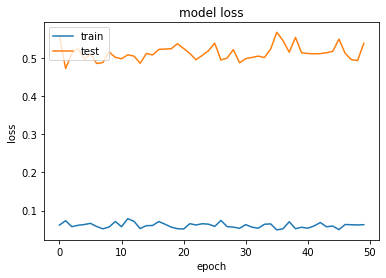

In [39]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

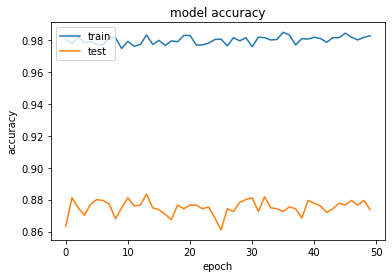

In [40]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

In [41]:
predictions =np.argmax(model.predict(x_testcnn),axis=-1)

55/55 [==============================] - 2s 4ms/step


In [42]:
predictions

array([0, 3, 0, ..., 1, 5, 0], dtype=int64)

In [43]:
y_test

array([0, 3, 0, ..., 1, 5, 0])

In [44]:
new_Ytest = y_test.astype(int)

In [45]:
new_Ytest

array([0, 3, 0, ..., 1, 5, 0])

In [46]:
from sklearn.metrics import classification_report

report = classification_report(new_Ytest,predictions)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       201
           1       0.72      0.90      0.80       123
           2       0.91      0.79      0.85       256
           3       0.87      0.83      0.85       263
           4       0.90      0.94      0.92       255
           5       0.82      0.89      0.85       241
           6       0.89      0.88      0.89       193
           7       0.90      0.88      0.89       202

    accuracy                           0.87      1734
   macro avg       0.87      0.88      0.87      1734
weighted avg       0.88      0.87      0.87      1734



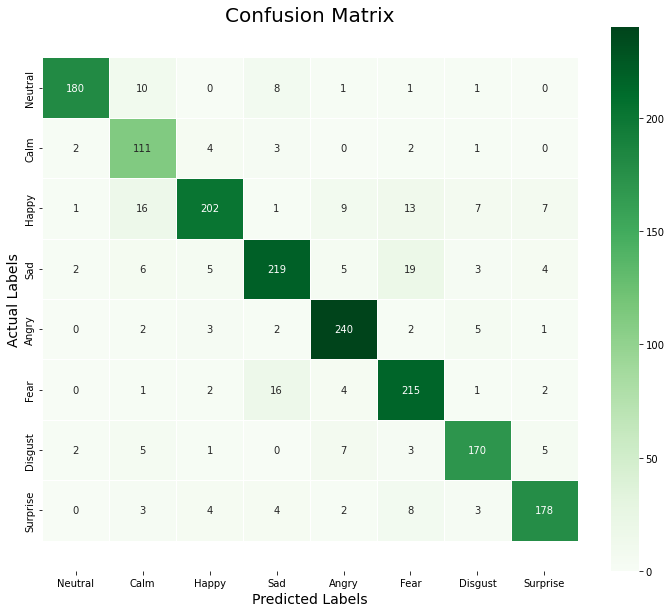

In [47]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

new_Ytest = y_test.astype(int)
matrix = confusion_matrix(new_Ytest,predictions)
# print (matrix)
# 0 = neutral, 1 = calm, 2 = happy, 3 = sad, 4 = angry, 5 = fearful, 6 = disgust, 7 = surprised

plt.figure(figsize = (12, 10))
matrix = pd.DataFrame(matrix , index = ["Neutral","Calm","Happy","Sad","Angry","Fear","Disgust","Surprise"] , columns = ["Neutral","Calm","Happy","Sad","Angry","Fear","Disgust","Surprise"])
ax = sns.heatmap(matrix, linecolor='white', cmap='Greens', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [48]:
model.save('Final_model.h5')
print("MODEL SAVED")

MODEL SAVED


In [49]:
new_model=keras.models.load_model('Final_model.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 40, 64)            384       
                                                                 
 activation (Activation)     (None, 40, 64)            0         
                                                                 
 dropout (Dropout)           (None, 40, 64)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 10, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 128)           41088     
                                                                 
 activation_1 (Activation)   (None, 10, 128)           0         
                                                        

In [50]:
loss, acc = new_model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

55/55 [==============================] - 1s 5ms/step - loss: 0.5392 - accuracy: 0.8737
Restored model, accuracy: 87.37%
